In [1]:
%matplotlib inline

import pandas as pd
#import requests
#from bs4 import BeautifulSoup

#import time

from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


from pandas import set_option
set_option("display.max_rows", 35)

LARGE_FIGSIZE = (12, 8)
style.use('ggplot')

In [2]:
age_df = pd.read_csv('age.log',sep='\t',header=False)
age_df.columns = ['Disease','Barcode','Age']
age_df.head()

#tmp = DataFrame(age_df['Age'])
#tmp['Age'].value_counts()
#tmp = tmp[~tmp.applymap(np.isreal).all(1)]
#tmp['Age'].value_counts()

#age_df[~age_df['Age'].applymap(np.isreal).all(1)]
#age_df.info()
#age_df['Age'].describe()
age_df['Age'].value_counts()

60    333
63    324
61    319
58    304
62    304
66    299
59    298
57    295
65    285
67    283
64    282
69    277
68    276
70    264
51    261
56    260
54    254
     ... 
24     35
27     35
86     34
23     32
25     31
20     26
88     24
21     19
22     14
19     13
89     12
18     12
17      9
14      5
15      3
16      2
10      1
dtype: int64

In [3]:
print 'oldest:', age_df['Age'].max()
print 'youngest', age_df['Age'].min()
#age_df[age_df.Age==18].count()

oldest: 90
youngest 10


In [4]:
print 'Age 90:',age_df[age_df.Age==90].Age.count()
print 'Age 10:',age_df[age_df.Age==10].Age.count()

Age 90: 46
Age 10: 1


In [5]:

#age_df.Age = age_df.Age.str.strip(' ')
#tmp_df = age_df[age_df.Age == ':']
#tmp_df.info()

#age_df = age_df[age_df.Age != ':']
 

#age_df.Age = age_df.Age.replace(':',np.nan)


In [6]:

age_df['Age'] = age_df['Age'].astype(int)

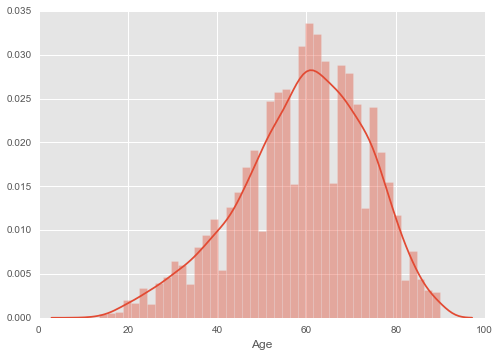

In [7]:
sns.distplot(age_df['Age'])

In [8]:
age_df.Age.describe()

count    10909.000000
mean        59.176185
std         14.372855
min         10.000000
25%         50.000000
50%         60.000000
75%         70.000000
max         90.000000
Name: Age, dtype: float64

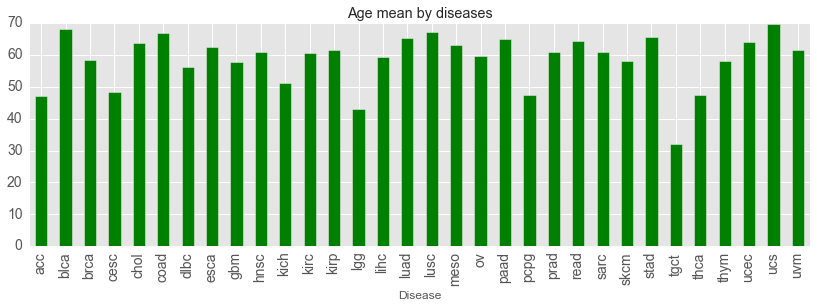

In [10]:
m = DataFrame(age_df.groupby('Disease').mean())

m.plot(kind='bar',color='green',title='Age mean by diseases', grid=True,
      fontsize=14, figsize=(14,4),legend=False)
#m.plot
#for item in m:
#    print m

In [12]:
race_df = pd.read_csv('race.log',sep='\t',header=False)
race_df.columns = ['Barcode','Race']
race_df


,Barcode,Race
0,TCGA-UW-A72H,WHITE
1,TCGA-KO-8406,WHITE
2,TCGA-KM-8442,Not_Available
3,TCGA-UW-A7GJ,BLACK OR AFRICAN AMERICAN
4,TCGA-KM-A7QG,WHITE
5,TCGA-UW-A72R,BLACK OR AFRICAN AMERICAN
6,TCGA-KM-A7QJ,ASIAN
7,TCGA-KN-8424,WHITE
8,TCGA-UW-A72N,WHITE
9,TCGA-UW-A7GR,WHITE


In [13]:
race_df.Race = race_df.Race.str.strip(' ')
race_df = race_df.replace('Not_Available',np.nan)

In [14]:
?race_df.Race.combine#('AMERICAN INDIAN OR ALASKA NATIVE','NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER')

In [15]:
race_df.Race.value_counts()

WHITE                                        8004
BLACK OR AFRICAN AMERICAN                     919
ASIAN                                         673
AMERICAN INDIAN OR ALASKA NATIVE               27
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      13
dtype: int64

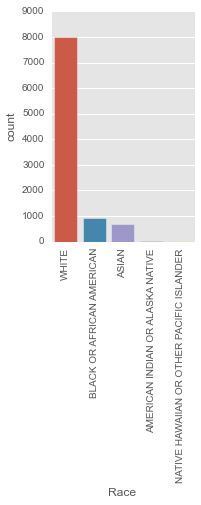

In [16]:
p = sns.factorplot('Race',data=race_df,kind='count')
p.set_xticklabels(rotation='vertical')

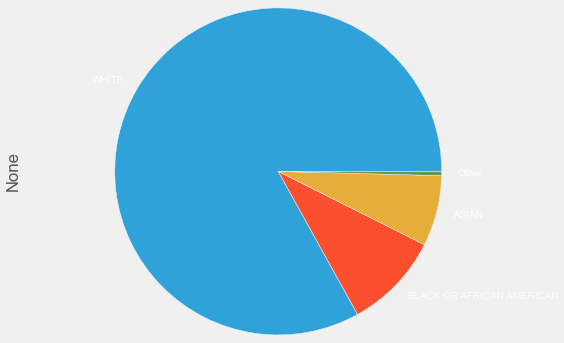

In [30]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

race_df = race_df.replace('AMERICAN INDIAN OR ALASKA NATIVE','O')
race_df = race_df.replace('NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'O')
race_df.Race.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('')

plt.savefig('raceDist2.png')

#print matplotlib.__file__

In [26]:
#race_df.isnull().any()
race_df.isnull().any().any()

True

In [27]:
race_df.isnull().sum()

Barcode       0
Race       1323
dtype: int64

In [28]:
total = pd.merge(age_df,race_df)

In [29]:
total.head()

,Disease,Barcode,Age,Race
0,kich,TCGA-UW-A72H,48,WHITE
1,kich,TCGA-KO-8406,17,WHITE
2,kich,TCGA-KM-8442,38,NaN
3,kich,TCGA-UW-A7GJ,52,BLACK OR AFRICAN AMERICAN
4,kich,TCGA-KM-A7QG,55,WHITE


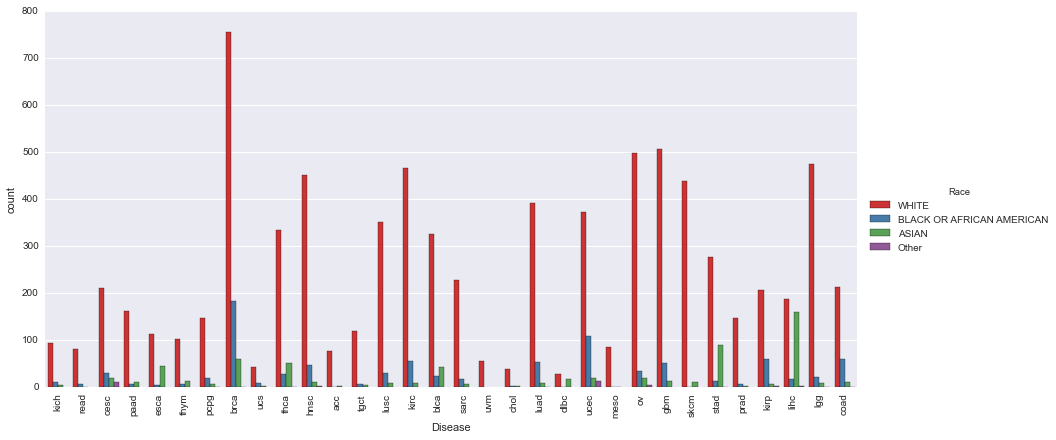

In [30]:
g = sns.factorplot("Disease", data=total, hue='Race',
               orient="h", size=6, aspect=2, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')

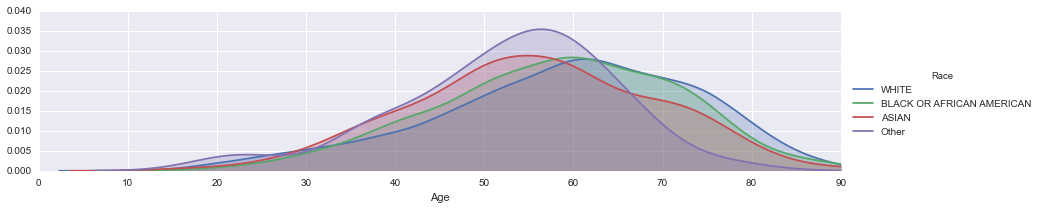

In [31]:
fig = sns.FacetGrid(total, hue="Race",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = total['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

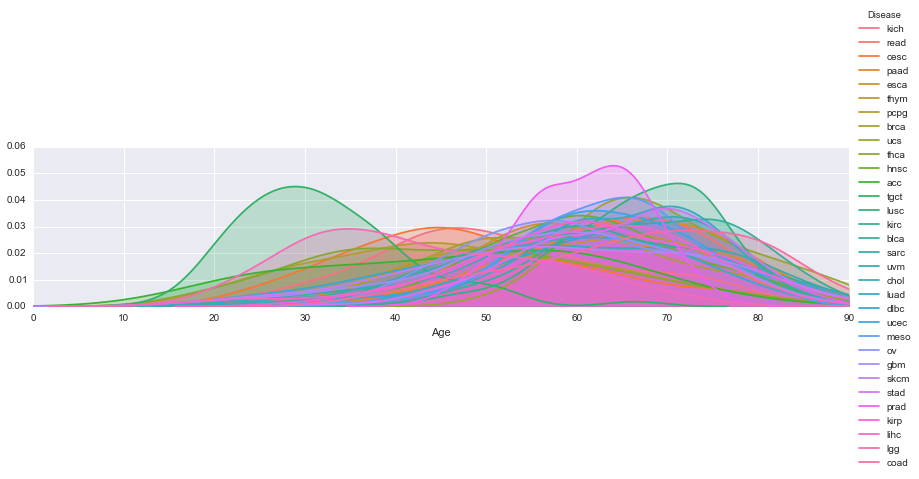

In [32]:
fig = sns.FacetGrid(total, hue="Disease",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = total['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

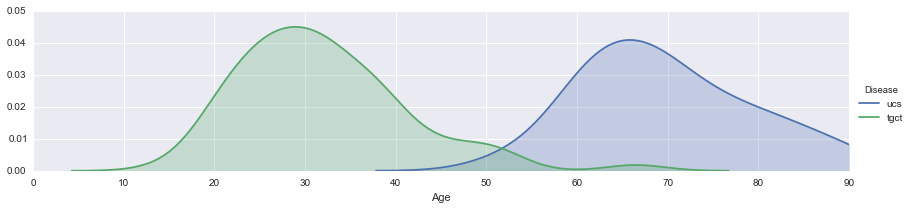

In [33]:
filter1 = total[total.Disease=='ucs']
filter2 = total[total.Disease=='tgct']
filter3 = filter1.append(filter2)
fig = sns.FacetGrid(filter3, hue="Disease",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = filter3['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

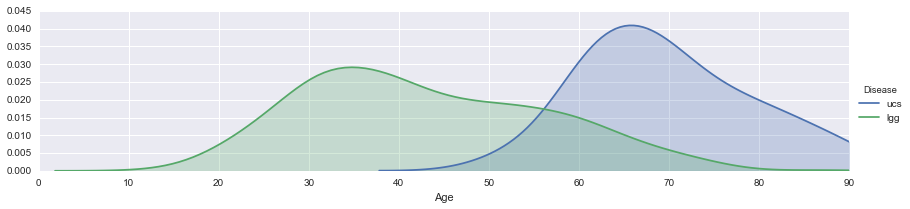

In [34]:
filter1 = total[total.Disease=='ucs']
filter2 = total[total.Disease=='lgg']
filter3 = filter1.append(filter2)
fig = sns.FacetGrid(filter3, hue="Disease",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = filter3['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

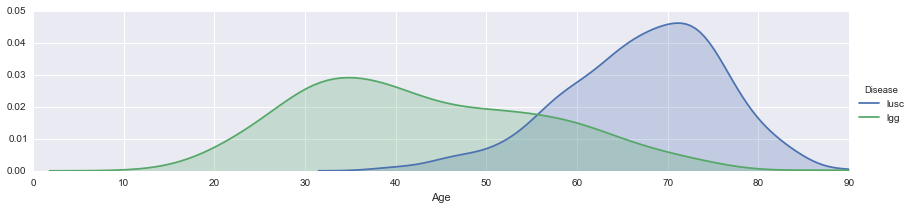

In [35]:
filter1 = total[total.Disease=='lusc']
filter2 = total[total.Disease=='lgg']
filter3 = filter1.append(filter2)
fig = sns.FacetGrid(filter3, hue="Disease",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = filter3['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

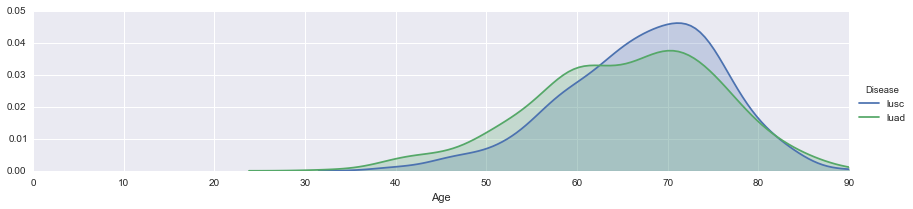

In [36]:
filter1 = total[total.Disease=='lusc']
filter2 = total[total.Disease=='luad']
filter3 = filter1.append(filter2)
fig = sns.FacetGrid(filter3, hue="Disease",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = filter3['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [37]:
gender_df = pd.read_csv('gender.log',sep='\t')
gender_df.columns=['Barcode','Gender']
gender_df

,Barcode,Gender
0,TCGA-UW-A72H,MALE
1,TCGA-KO-8406,FEMALE
2,TCGA-KM-8442,MALE
3,TCGA-UW-A7GJ,FEMALE
4,TCGA-KM-A7QG,FEMALE
5,TCGA-UW-A72R,FEMALE
6,TCGA-KM-A7QJ,MALE
7,TCGA-KN-8424,FEMALE
8,TCGA-UW-A72N,MALE
9,TCGA-UW-A7GR,FEMALE


In [38]:
gender_df.Gender.value_counts()

FEMALE    5723
MALE      5236
dtype: int64

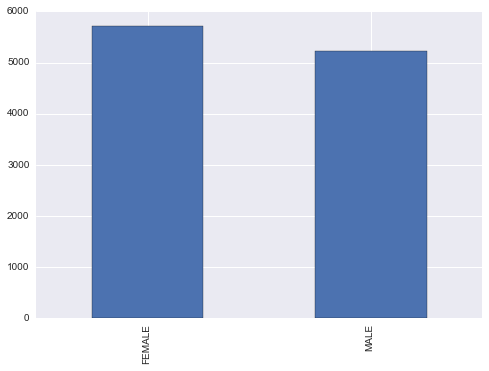

In [39]:
gender_df.Gender.value_counts().plot(kind='bar')

In [40]:
total = pd.merge(total, gender_df)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10909 entries, 0 to 10908
Data columns (total 5 columns):
Disease    10909 non-null object
Barcode    10909 non-null object
Age        10909 non-null int64
Race       9625 non-null object
Gender     10909 non-null object
dtypes: int64(1), object(4)
memory usage: 511.4+ KB


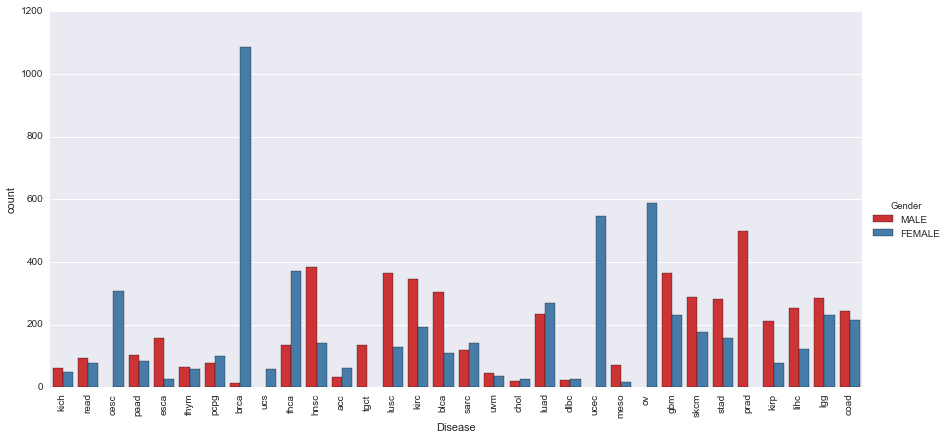

In [41]:
g = sns.factorplot("Disease", data=total, hue='Gender',
               orient="h", size=6, aspect=2, palette="Set1",
               kind='count')
g.set_xticklabels(rotation='vertical')


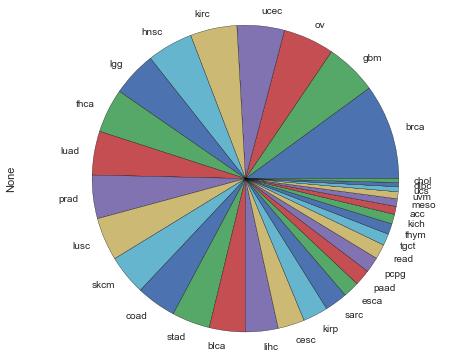

In [42]:
total.Disease.value_counts().plot(kind='pie')
plt.axis('equal')
plt.rcParams['font.size'] = 12


In [43]:
?range()
white_balls = range(1,70,5
                   )
print white_balls

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66]


In [44]:
#my powerball generator

#white_balls = range(70)

white_draw_list = []
count = 0
while not count == 5 :

    m=np.random.choice(range(1,70)) 
    if white_draw_list.count(m)==0:
        white_draw_list.append(m)
        count += 1
    else:
        continue

print '5 white balls:', white_draw_list

print 'one red ball:'
print np.random.choice(range(1,27))

print "Good luck"

5 white balls: [7, 12, 55, 60, 15]
one red ball:
17
Good luck


In [169]:
from numpy import random

In [56]:
numbers = range(1,10)
np.random.permutation(numbers)

array([5, 7, 6, 1, 4, 3, 2, 8, 9])

In [105]:
whites = np.random.permutation(range(1,70))[0:5]
print "white balls:", whites
red = np.random.choice(range(1,27))
print "red ball:",red
#whites.append(np.random)



white balls: [43 39 60 28 45]
red ball: 11


In [58]:
a = list(np.random.permutation(range(1,70))[0:5])
a.append(np.random.choice(range(1,27)))



In [194]:
print list(np.random.permutation(range(1,70))[0:5])

[60, 17, 46, 23, 67]


In [106]:
69*68*67*66*65/5*4*3*2*1

6473383488

In [107]:
6473383488*26

168307970688